In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [34]:
data = pd.read_csv('diabetes.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [36]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [37]:
data.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [38]:
le_smoke= LabelEncoder()
data['smoking_history'] = le_smoke.fit_transform(data['smoking_history'])
data["smoking_history"].unique()

array([4, 0, 1, 3, 2, 5])

In [39]:
data["gender"].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [40]:
le_gender= LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
data["gender"].unique()

array([0, 1, 2])

In [41]:
X = data.drop('diabetes', axis=1)

In [42]:
y = data.diabetes

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
model = LogisticRegression(max_iter=1000)

In [47]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
y_pred = model.predict(X_test)

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

0.9589


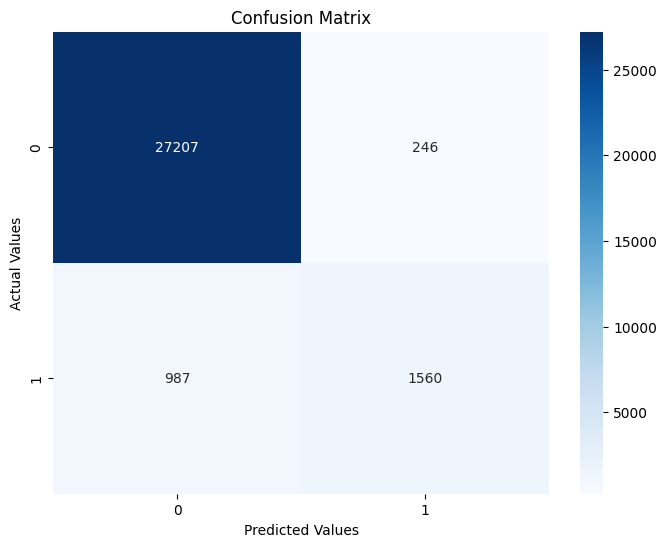

<Figure size 640x480 with 0 Axes>

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


plt.tight_layout()
plt.show()

In [71]:
import pickle

model1 = {"model": model, "le_smoke": le_smoke, "le_gender": le_gender}
with open('model1.pkl', 'wb') as file:
    pickle.dump(model1, file)

In [60]:
age = float(input("Enter age (8-80): "))
bmi = float(input("Enter BMI (10.01-95.69): "))
gender = input("Gender")
hypertension = input("hypertension")          
heart_disease = input("heart")         
smoking_history = input("smoke")      
HbA1c_level  = float(input("Hb "))        
blood_glucose_level  =float(input("blood"))  

input_data = pd.DataFrame([[gender, age, hypertension, heart_disease, smoking_history,bmi,HbA1c_level, blood_glucose_level     ]], columns=X_train.columns)   
outcome = model.predict(input_data)
print(gender)        
print(f"Predicted Disease Outcome:{outcome}")

Enter age (8-80): 10
Enter BMI (10.01-95.69): 23
Gender2
hypertension1
heart0
smoke2
Hb 4
blood120
2
Predicted Disease Outcome:[0]


Text(0.5, 1.0, 'Distribution of Diabetes in Age')

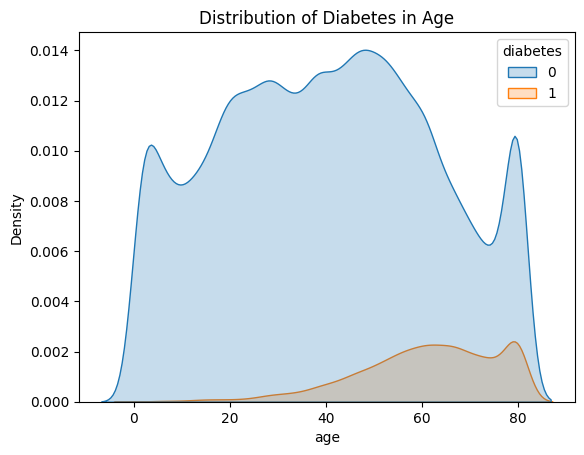

In [69]:
sns.kdeplot(data=data,x='age',hue='diabetes',fill=True)
plt.title('Distribution of Diabetes in Age')

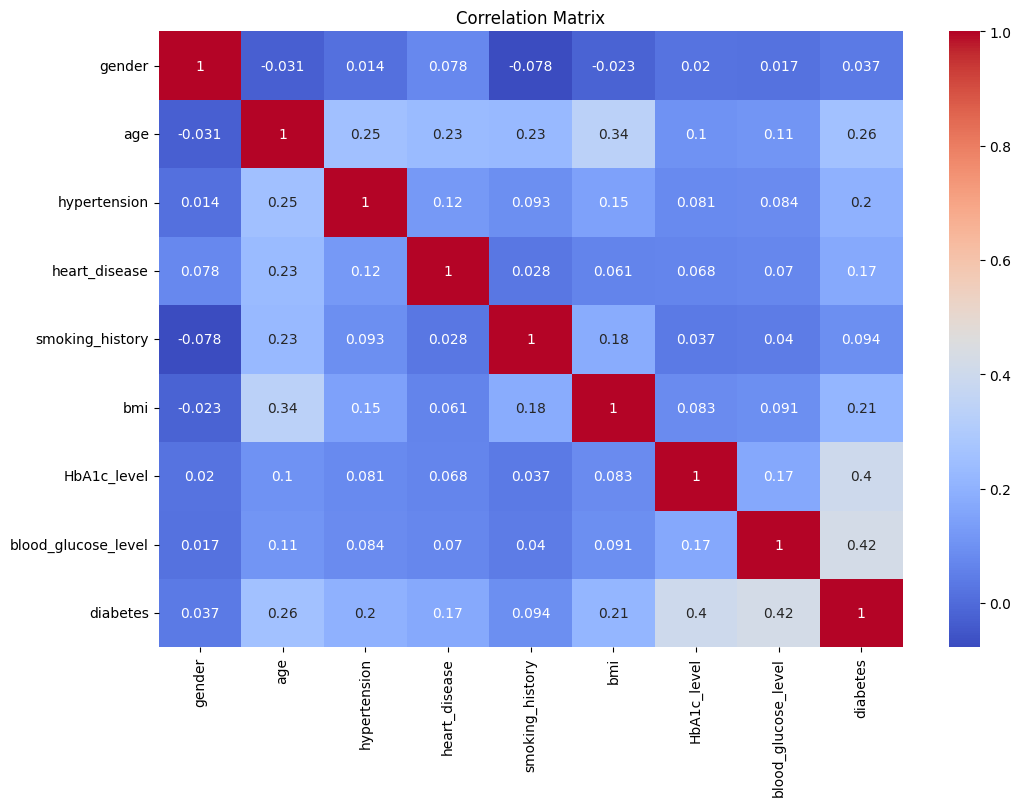

In [67]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()